#setup 

In [1]:
apikey = 'CKrDP4SDBGV8XK95W3hllc3xP618zeEDaBUf79xycdHXnSxOlGy5UOum5yPThgA7'
secret = '1GvafbHfiq0txcz9wf0TxBOxxJuVNZgOgyZYgfmLUb1QLB6JEFmM0KWdYHV7BiQV'

In [2]:
!pip install python-binance mplfinance

In [5]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager 
import pandas as pd

In [6]:
# autneticate to binance
client = Client(apikey, secret)

In [8]:
# get tickers
tickers = client.get_all_tickers()

In [12]:
tickers[0]['price']

'0.06129200'

In [13]:
ticker_df = pd.DataFrame(tickers)

In [14]:
ticker_df.head()

,symbol,price
0,ETHBTC,0.06129200
1,LTCBTC,0.00431400
2,BNBBTC,0.00923100
3,NEOBTC,0.00124600
4,QTUMETH,0.00360900


In [16]:
ticker_df.set_index('symbol', inplace=True)

In [18]:
ticker_df.loc['ETHUSDT']

price    2236.56000000
Name: ETHUSDT, dtype: object

In [21]:
# get depth 

depth = client.get_order_book(symbol='BTCUSDT')

In [22]:
depth

{'lastUpdateId': 11791469849,
 'bids': [['36434.24000000', '0.47862300'],
  ['36434.23000000', '0.42171400'],
  ['36432.26000000', '0.00600000'],
  ['36431.19000000', '0.05570300'],
  ['36430.28000000', '0.08594000'],
  ['36429.90000000', '0.00600000'],
  ['36428.61000000', '0.00600000'],
  ['36427.55000000', '0.00600000'],
  ['36426.76000000', '0.40000000'],
  ['36426.74000000', '1.24800000'],
  ['36426.18000000', '0.10000000'],
  ['36423.94000000', '0.29919100'],
  ['36422.83000000', '0.02000000'],
  ['36417.40000000', '0.27242200'],
  ['36416.71000000', '0.05488400'],
  ['36413.62000000', '0.04727000'],
  ['36413.61000000', '0.50000000'],
  ['36413.35000000', '0.29920500'],
  ['36413.34000000', '0.00123700'],
  ['36411.12000000', '0.25000000'],
  ['36410.51000000', '0.03220700'],
  ['36409.56000000', '0.03731700'],
  ['36409.55000000', '0.75000000'],
  ['36409.54000000', '0.08000000'],
  ['36406.71000000', '0.32531200'],
  ['36406.35000000', '0.19544900'],
  ['36401.51000000', '0.02

In [23]:
depth_df = pd.DataFrame(depth['bids'])
depth_df.columns = ['Price', 'Volume']
depth_df.head()

,Price,Volume
0,36434.24000000,0.47862300
1,36434.23000000,0.42171400
2,36432.26000000,0.00600000
3,36431.19000000,0.05570300
4,36430.28000000,0.08594000


In [24]:
# get historical data
depth_df.dtypes

Price     object
Volume    object
dtype: object

In [28]:
client.get_historical_klines??

Signature:
client.get_historical_klines(
    symbol,
    interval,
    start_str,
    end_str=None,
    limit=500,
    klines_type: binance.enums.HistoricalKlinesType = <HistoricalKlinesType.SPOT: 1>,
)
Source:   
    def get_historical_klines(self, symbol, interval, start_str, end_str=None, limit=500,
                              klines_type: HistoricalKlinesType = HistoricalKlinesType.SPOT):
        """Get Historical Klines from Binance

        :param symbol: Name of symbol pair e.g BNBBTC
        :type symbol: str
        :param interval: Binance Kline interval
        :type interval: str
        :param start_str: Start date string in UTC format or timestamp in milliseconds
        :type start_str: str|int
        :param end_str: optional - end date string in UTC format or timestamp in milliseconds (default will fetch everything up to now)
        :type end_str: str|int
        :param limit: Default 500; max 1000.
        :type limit: int
        :param klines_type: Historical kli

In [33]:
historical = client.get_historical_klines('ETHBTC', Client.KLINE_INTERVAL_1DAY, '1 Jan 2011')

In [35]:
#historical 

In [36]:
hist_df = pd.DataFrame(historical)

In [37]:
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1499990400000,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,1500076799999,170.23852396,1994,1076.40500000,94.82527222,22262.26697743
1,1500076800000,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,1500163199999,363.03178785,4623,2250.31800000,203.54149755,22275.36801826
2,1500163200000,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,1500249599999,722.21248196,8137,5557.57500000,450.34388688,22295.47295841
3,1500249600000,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,1500335999999,568.24653804,7639,3859.48500000,329.66875309,22165.74281157
4,1500336000000,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,1500422399999,674.49785037,8121,4202.05500000,393.11140275,22505.62469176


In [40]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [42]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1431,1623628800000,0.06430600,0.06464600,0.06238900,0.06369900,163306.55700000,1623715199999,10377.26965430,215381,78170.64700000,4965.36434207,0
1432,1623715200000,0.06370400,0.06520000,0.06296700,0.06334900,149346.69500000,1623801599999,9585.71990033,194293,71847.67300000,4605.22823959,0
1433,1623801600000,0.06335500,0.06339700,0.06142500,0.06176100,120161.52400000,1623887999999,7517.68078672,166156,62189.88300000,3891.94152151,0
1434,1623888000000,0.06175600,0.06279100,0.06096300,0.06230400,114289.95100000,1623974399999,7077.50326090,163247,60648.85200000,3754.40986771,0
1435,1623974400000,0.06230000,0.06246700,0.06074900,0.06100000,86714.80800000,1624060799999,5343.40385737,126494,40295.89200000,2482.40721255,0


In [43]:
hist_df.shape

(1436, 12)

In [44]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [45]:
# preprocess historical data 
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit = 's')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit = 's')

In [47]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1431,2021-06-14,0.06430600,0.06464600,0.06238900,0.06369900,163306.55700000,2021-06-14 23:59:59.999000064,10377.26965430,215381,78170.64700000,4965.36434207,0
1432,2021-06-15,0.06370400,0.06520000,0.06296700,0.06334900,149346.69500000,2021-06-15 23:59:59.999000064,9585.71990033,194293,71847.67300000,4605.22823959,0
1433,2021-06-16,0.06335500,0.06339700,0.06142500,0.06176100,120161.52400000,2021-06-16 23:59:59.999000064,7517.68078672,166156,62189.88300000,3891.94152151,0
1434,2021-06-17,0.06175600,0.06279100,0.06096300,0.06230400,114289.95100000,2021-06-17 23:59:59.999000064,7077.50326090,163247,60648.85200000,3754.40986771,0
1435,2021-06-18,0.06230000,0.06246700,0.06074900,0.06100000,86714.80800000,2021-06-18 23:59:59.999000064,5343.40385737,126494,40295.89200000,2482.40721255,0


In [48]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [49]:
hist_df[numeric_columns] =  hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [50]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1431,2021-06-14,0.064306,0.064646,0.062389,0.063699,163306.557,2021-06-14 23:59:59.999000064,10377.269654,215381,78170.647,4965.364342,0
1432,2021-06-15,0.063704,0.065200,0.062967,0.063349,149346.695,2021-06-15 23:59:59.999000064,9585.719900,194293,71847.673,4605.228240,0
1433,2021-06-16,0.063355,0.063397,0.061425,0.061761,120161.524,2021-06-16 23:59:59.999000064,7517.680787,166156,62189.883,3891.941522,0
1434,2021-06-17,0.061756,0.062791,0.060963,0.062304,114289.951,2021-06-17 23:59:59.999000064,7077.503261,163247,60648.852,3754.409868,0
1435,2021-06-18,0.062300,0.062467,0.060749,0.061000,86714.808,2021-06-18 23:59:59.999000064,5343.403857,126494,40295.892,2482.407213,0


In [51]:
hist_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,1436.000000,1436.000000,1436.000000,1436.000000,1.436000e+03,1436.000000,1.436000e+03,1436.000000,1436.000000
mean,0.041207,0.042317,0.040039,0.041193,2.148354e+05,7994.553982,1.933535e+05,107888.201189,4012.124715
std,0.021352,0.022122,0.020538,0.021333,1.463613e+05,6232.812488,1.412509e+05,72991.080126,3060.957485
min,0.016415,0.016560,0.016150,0.016415,1.942057e+03,170.238524,1.994000e+03,1076.405000,94.825272
25%,0.025754,0.026170,0.025123,0.025756,1.212346e+05,3896.656623,1.069252e+05,61373.006250,1954.742284
50%,0.032855,0.033571,0.032200,0.032855,1.808609e+05,6653.612396,1.529945e+05,91731.833500,3398.484890
75%,0.055686,0.056504,0.053857,0.055698,2.765346e+05,9943.744913,2.381925e+05,139591.497000,5070.031891
max,0.113075,0.123799,0.109343,0.113185,1.396957e+06,56836.342035,1.201493e+06,701279.783000,28345.303271


In [52]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           1436 non-null   datetime64[ns]
 1   Open                1436 non-null   float64       
 2   High                1436 non-null   float64       
 3   Low                 1436 non-null   float64       
 4   Close               1436 non-null   float64       
 5   Volume              1436 non-null   float64       
 6   Close Time          1436 non-null   datetime64[ns]
 7   Quote Asset Volume  1436 non-null   float64       
 8   Number of Trades    1436 non-null   int64         
 9   TB Base Volume      1436 non-null   float64       
 10  TB Quote Volume     1436 non-null   float64       
 11  Ignore              1436 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 134.8+ KB


In [53]:
# visualize the dataset 

import mplfinance as mpf

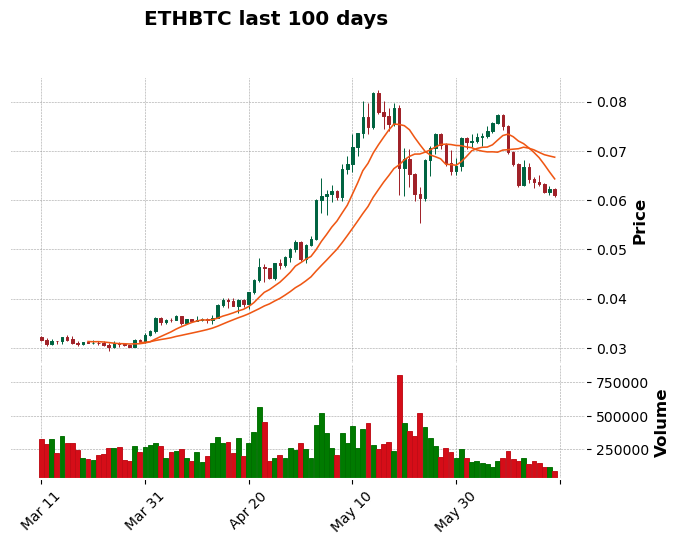

In [62]:
mpf.plot(hist_df.set_index('Close Time').tail(100), type = 'candle', style = 'charles', volume = True, title = 'ETHBTC last 100 days', mav=(10,20))